# _classification notebook_

## Classificastion task - Predict Stroke
Our top priority in this health problem is to identify patients with a stroke. Therefore, we would like to identify any observation that may be a stroke. In fact, we will make sure that the models reduce False Negative cases as much as possible.

## general knowledge:

A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly.

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths, accounting for 6.2 million deaths. Approximately 17 million people had a stroke in 2010 and 33 million people have previously had a stroke and were still alive. Between 1990 and 2010 the number of strokes decreased by approximately 10% in the developed world and increased by 10% in the developing world.

The main risk factor for stroke is high blood pressure. Other risk factors include tobacco smoking, obesity, high blood cholesterol, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation.

(source - https://en.wikipedia.org/wiki/Stroke)

High blood pressure, high cholesterol, smoking, obesity, and diabetes are leading causes of stroke. 1 in 3 US adults has at least one of these conditions or habits. This information may help as to build a model.
(source - https://www.cdc.gov/stroke/facts.htm)


This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about a patient.

## attributes information

The data contains 5110 observations with 12 attributes.

- id: unique identifier.
- gender: "Male", "Female" or "Other".
- age: age of the patient.
- hypertension: hypertension means high blood pressure. 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes".
- work_type: "children", "Govt_job", "Never_worked", "Private" or "Self-employed".
- Residence_type: "Rural" or "Urban".
- avg_glucose_level: average glucose level in blood.
- bmi: body mass index, As a measure of obesity.
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*.
- stroke: 1 if the patient had a stroke or 0 if not.<br>

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient.

# imports

In [211]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<br>
let's take a look at the attributes categories:

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


we can see that: gender, ever_married, Residence_type, smoking_status are a categorials attributes. we will handle it soon and convert is to numeric values.
also, the bmi attribute has 201 missing values. It's need to be handled too.

In [91]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [92]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


important information from the table above:
- 4.87% of the observation in this dataset had stroke.
- 

### let's look at the numeric attributes histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C2CDC36A30>,
      dtype=object)

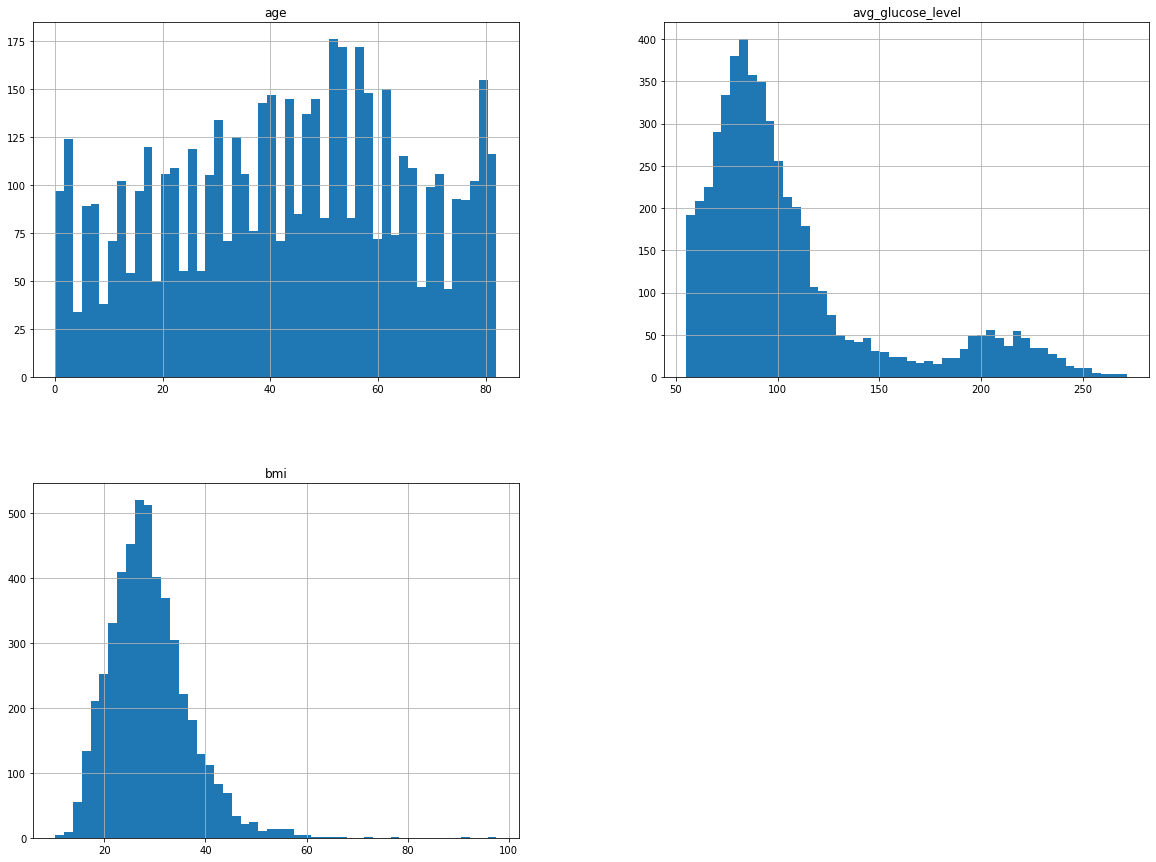

In [93]:
atttibutes_hist = df[["age", "avg_glucose_level", "bmi"]].hist(bins=50, figsize=(20,15))
atttibutes_hist

### let's look at the categorial attributes histograma:

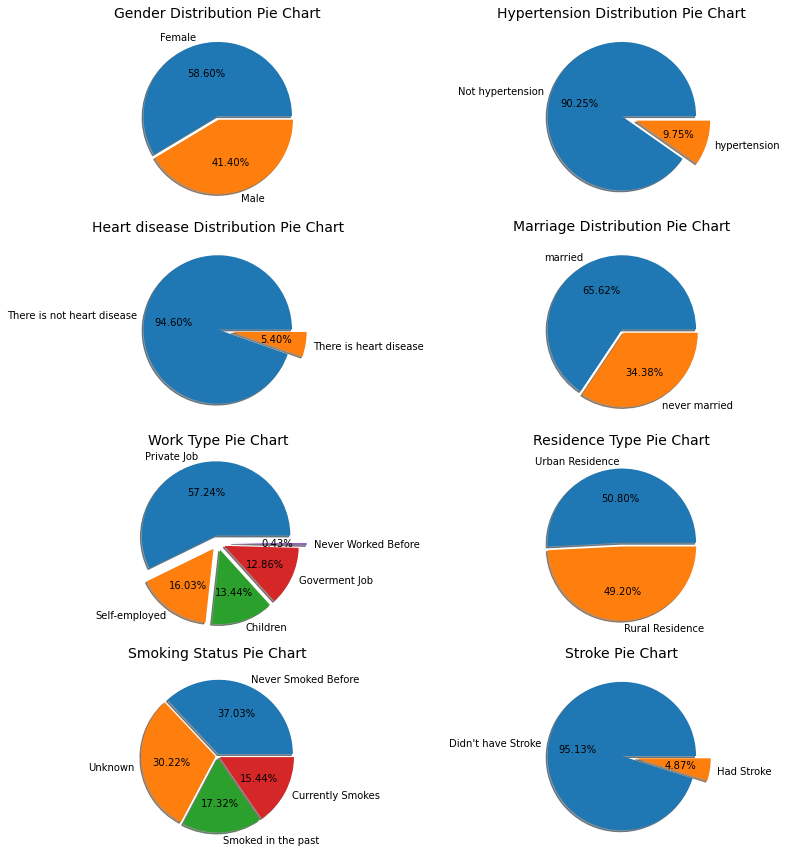

In [170]:
fig, ax = plt.subplots(4,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not hypertension", "hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is not heart disease", "There is heart disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["married", "never married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax4.set_title("Marriage Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Private Job", "Self-employed", "Children", "Goverment Job", "Never Worked Before"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Urban Residence", "Rural Residence"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax6.set_title("Residence Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Never Smoked Before", "Unknown", "Smoked in the past", "Currently Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.03, 0.03, 0.03, 0.03])
ax7.set_title("Smoking Status Pie Chart", fontdict={'fontsize': 14})

labels = ["Didn't have Stroke", "Had Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax8.set_title("Stroke Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

# prepare the data

#### there are few missing values in 'bmi' attribute. we will see soon that the correlation between stroke and bmi is low (4.2%), so we will update all the missing value of the bmi with the mean.

In [62]:
bmi_mean = df["bmi"].mean()
df["bmi"].fillna(bmi_mean, inplace=True)

df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### as we can see, in the 'gender' attribute, there is one observation that is not female or male. because it's just one I will remove this observation.

In [216]:
print(df['gender'].value_counts())
df = df[df['gender'] != "Other"]


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [217]:
# just check:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

## handeling text and categorial attributes

### first of all, I will use "get_dummies" function to "convert" every categorial attribute.
### now, we have seperate column for each value. note that the stroke column (targets) as is. let's see the columns:

In [218]:
df_copy = df.copy()
df_result = pd.get_dummies(df_copy, columns=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], prefix=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] )
df_result.rename(columns={"hypertension_0": "no_hypertension", "hypertension_1": "yes_hypertension", "heart_disease_0": "no_heart_disease", "heart_disease_1": "yes_heart_disease"}, inplace=True)

df_result.columns.tolist()

['id',
 'age',
 'avg_glucose_level',
 'bmi',
 'stroke',
 'no_hypertension',
 'yes_hypertension',
 'no_heart_disease',
 'yes_heart_disease',
 'gender_Female',
 'gender_Male',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

# dig into the DATA

## Let's try so uncover some patterns.

#### although linear correlations are not the only correlations we can find, it can gives us a good start.

### covavian matrix:

In [231]:
df_result.corr()

,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003677,0.000943,0.003238,0.006430,-0.003610,0.003610,0.001253,-0.001253,-0.001929,...,0.005471,0.023545,-0.019879,-0.013869,0.001219,-0.001219,-0.019126,0.007419,0.011567,0.001081
age,0.003677,1.000000,0.238323,0.333314,0.245239,-0.276367,0.276367,-0.263777,0.263777,0.027752,...,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
avg_glucose_level,0.000943,0.238323,1.000000,0.175672,0.131991,-0.174540,0.174540,-0.161907,0.161907,-0.054722,...,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.003238,0.333314,0.175672,1.000000,0.042341,-0.167770,0.167770,-0.041322,0.041322,0.026164,...,-0.028615,0.208205,0.072634,-0.448779,0.000293,-0.000293,-0.270481,0.107463,0.107847,0.088261
stroke,0.006430,0.245239,0.131991,0.042341,1.000000,-0.127891,0.127891,-0.134905,0.134905,-0.009081,...,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
no_hypertension,-0.003610,-0.276367,-0.174540,-0.167770,-0.127891,1.000000,-1.000000,0.108292,-0.108292,0.021223,...,0.021612,0.005358,-0.115417,0.129535,-0.007980,0.007980,0.141551,-0.059022,-0.065018,-0.031213
yes_hypertension,0.003610,0.276367,0.174540,0.167770,0.127891,-1.000000,1.000000,-0.108292,0.108292,-0.021223,...,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
no_heart_disease,0.001253,-0.263777,-0.161907,-0.041322,-0.134905,0.108292,-0.108292,1.000000,-1.000000,0.085685,...,0.015715,-0.000068,-0.086742,0.091654,0.003045,-0.003045,0.066765,-0.066938,0.021893,-0.044030
yes_heart_disease,-0.001253,0.263777,0.161907,0.041322,0.134905,-0.108292,0.108292,-1.000000,1.000000,-0.085685,...,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
gender_Female,-0.001929,0.027752,-0.054722,0.026164,-0.009081,0.021223,-0.021223,0.085685,-0.085685,1.000000,...,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408


this is a little bit too much information in one table.<br>
what can we do?
- look just at the main coulmn/
- organize it in heatmaps by realated attributes (realated by common sense).

### correlations with stroke:

In [271]:
corr_matrix = df_result.corr()
corr_matrix["stroke"].sort_values(ascending = False)


stroke                            1.000000
age                               0.245239
yes_heart_disease                 0.134905
avg_glucose_level                 0.131991
yes_hypertension                  0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.042341
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
id                                0.006430
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
gender_Female                    -0.009081
work_type_Never_worked           -0.014885
Residence_type_Rural             -0.015415
smoking_status_Unknown           -0.055924
work_type_children               -0.083888
ever_married_No                  -0.108299
no_hypertension                  -0.127891
no_heart_di

###  heatmap corraltion of numerical attributes:

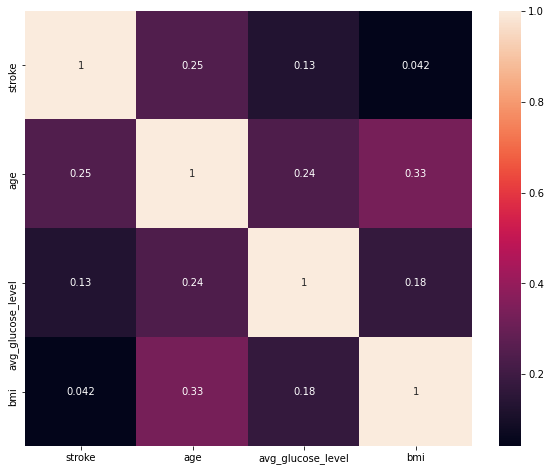

In [234]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)


### heatmap corraltion of categorial attributes: 

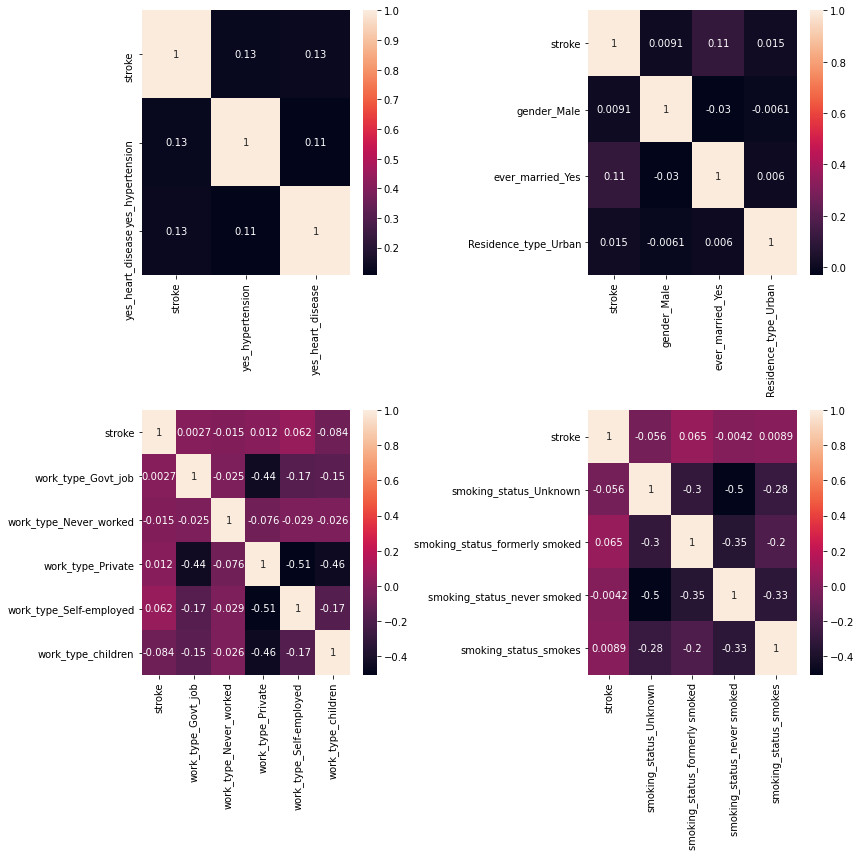

In [230]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

# the "no_" attributes is the opposite to the "yes_" attributes so the correlation to stroke will be the same but negative.
sns.heatmap(df_result[['stroke', 'yes_hypertension', 'yes_heart_disease']].corr(),annot=True, ax=ax1)
sns.heatmap(df_result[['stroke', 'gender_Male', 'ever_married_Yes', 'Residence_type_Urban']].corr(),annot=True, ax=ax2)
sns.heatmap(df_result[['stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']].corr(),annot=True, ax=ax3)
sns.heatmap(df_result[['stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']].corr(),annot=True, ax=ax4)

plt.tight_layout()
plt.show()

### attributes which have main correlations with stroke (>0.10):

- age
- avg glucose level
- hypertension
- heart disease background
- ever married

### let's take a closer glance at each of those attributes! what can we see?


- The older a person is, the more likely he have a stroke.
- Blood glucose level is dangerous at both edges.
- Hypertension increases the risk of stroke by 10%.
- Background of heart disease increases the risk of stroke by 13%.
- People who get married have a 5% higher risk of having a stroke.

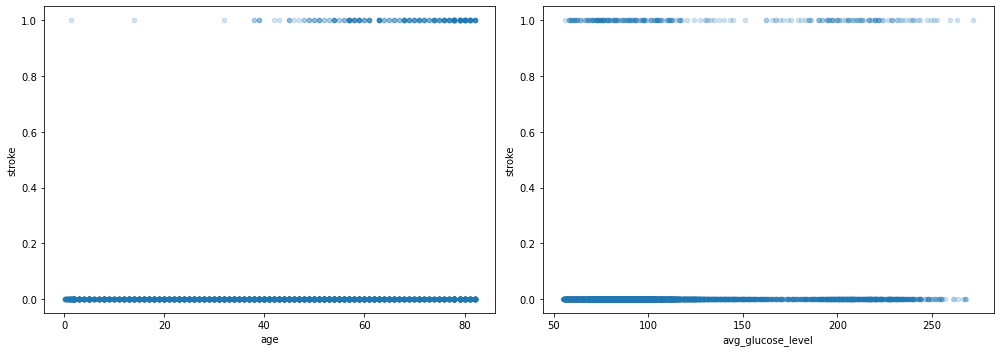

In [289]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5), )
((ax1, ax2)) = ax

df.plot(ax=ax1, kind='scatter', x='age', y='stroke', alpha = 0.2)
df.plot(ax=ax2, kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)

plt.tight_layout()
plt.show()

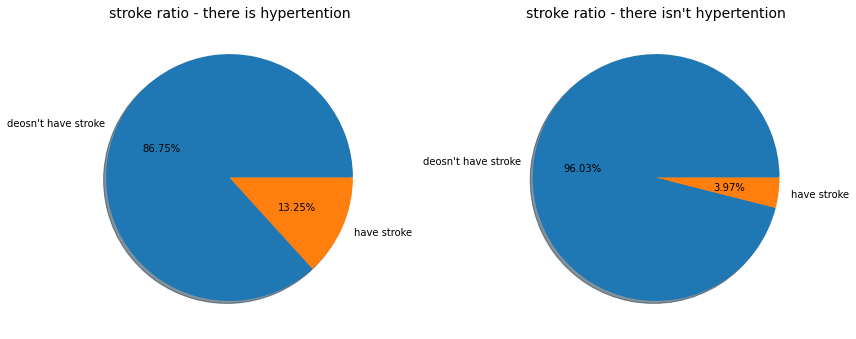

In [290]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_hypertension']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is hypertention", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_hypertension']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't hypertention", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

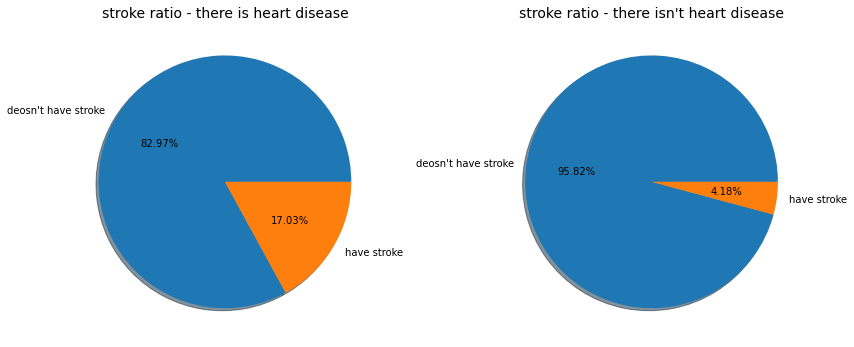

In [296]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_heart_disease']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is heart disease", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_heart_disease']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't heart disease", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

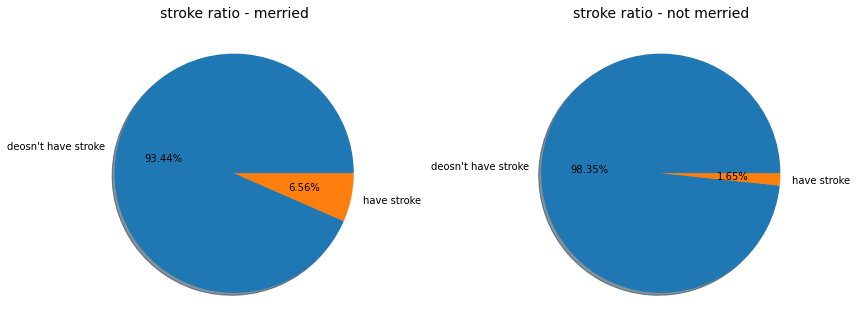

In [297]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_Yes']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_No']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - not merried", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()